<a href="https://colab.research.google.com/github/TenthEdict/ILS695/blob/main/keyword_pct_change.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install packages
!pip install bibtexparser
!pip install tomotopy
!pip install little_mallet_wrapper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 757.0 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bibtexparser: filename=bibtexparser-1.4.1-py3-none-any.whl size=43252 sha256=5acd7b2b50aa63ad3955075d40fc91e65c76be3cfdc18073e69031d7552de805
  Stored in directory: /root/.cache/pip/wheels/08/c6/c3/56e639fab68d1fdbf13ea147636d9795ccdbd3c1d3178d1332
Successfully built bibtexparser
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.2/17.2 MB 21.8 MB/s eta 0:00:00


In [ ]:
# import libraries
import bibtexparser
import pandas as pd
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter
nltk.download('punkt')
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
import tomotopy as tp
import little_mallet_wrapper
import seaborn
import glob
from pathlib import Path
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
# load data
with open("/content/drive/MyDrive/school/02 purdue/ILS 695/data/2024-03-03_psycinfo_export_02.bib") as psycfile:
  bibtex_data = bibtexparser.load(psycfile)

In [ ]:
# function to select entries by year with year being a string
def get_entries_by_year(bibtex_data, year):

  # create list for entries
  selected_entries = []

  # iterate through entries
  for entry in bibtex_data.entries:

    # select entries with selected year
    if entry['year'] == year:

      # add it to the list
      selected_entries.append(entry)

  # return list of entries from specified year
  return selected_entries

In [ ]:
entries_2015 = get_entries_by_year(bibtex_data, '2015')
entries_2016 = get_entries_by_year(bibtex_data, '2016')
entries_2017 = get_entries_by_year(bibtex_data, '2017')
entries_2018 = get_entries_by_year(bibtex_data, '2018')
entries_2019 = get_entries_by_year(bibtex_data, '2019')
entries_2020 = get_entries_by_year(bibtex_data, '2020')
entries_2021 = get_entries_by_year(bibtex_data, '2021')
entries_2022 = get_entries_by_year(bibtex_data, '2022')
entries_2023 = get_entries_by_year(bibtex_data, '2023')
entries_2024 = get_entries_by_year(bibtex_data, '2024')

#print(len(entries_2019), len(entries_2020), len(entries_2021), len(entries_2022), len(entries_2023), len(entries_2024))

In [ ]:
print(entries_2019[0])

{'year': '2019', 'volume': '12', 'url': 'joel.lefkowitz@baruch.cuny.edu, ORCID: 0000-0002-4384-767X', 'title': 'The conundrum of industrial-organizational psychology', 'pages': '473 - 478', 'number': '4', 'keywords': 'Critical Theory, industrial and organizational psychologists, I-O psychologists, capitalism, Marxism, neoliberalism, Capitalism, Philosophies, Criticism, Industrial and Organizational Psychology, Marxism, Political Liberalism, Psychologists, Theories', 'journal': 'Industrial and Organizational Psychology: Perspectives on Science and Practice', 'issn': '1754-9426, 1754-9434', 'author': 'Lefkowitz, Joel', 'abstract': "Comments on an article by D. K. Mumby (see record [rid]2019-81534-001[/rid]). Industrial and organizational (I-O) psychologists should be grateful to Prof. Mumby for providing theoretical insights regarding our domain of concern not often encountered in our own literature. Mumby presents a disturbing set of charges against capitalism—especially in its contempo

In [ ]:
# function to select and return authors as a list
def get_authors(entry_data):

  # create destination list for authors as singular elements
  authors_list = []

  # create temp list for processing
  authors_temp = []

  # create destination list
  for entry in entry_data:

    # try if possible
    try:

      # find author(s) and split by 'and' to create author elements
      authors = entry['author'].split(' and ')

      # add to author list
      authors_temp.append(authors)

    # tell user that there was an entry without an author
    except KeyError:
      print('entry exists without an author')

  # iterate through authors_temp to add individual authors to main list
  for authors in authors_temp:

    # add authors to main list
    authors_list += authors

  # return main list
  return authors_list


In [ ]:
authors_2019 = get_authors(entries_2019)


entry exists without an author


In [ ]:
# function to find keywords and return as list
def get_keywords(entry_data):

  # create empty list to add to
  keywords = []

  # iterate through every entry
  for entry in entry_data:

    # split keywords by comma and add to keyword list
    keywords += entry['keywords'].split(',')

  # create list of keywords as individual items and filter out ones without keywords
  keywords_as_items = [keyword.lower() for keyword in keywords if keyword != ' No terms assigned' and keyword != 'No terms assigned']

  # return main list
  return keywords_as_items

In [ ]:
keywords_2015 = get_keywords(entries_2015)
keywords_2016 = get_keywords(entries_2016)
keywords_2017 = get_keywords(entries_2017)
keywords_2018 = get_keywords(entries_2018)
keywords_2019 = get_keywords(entries_2019)
keywords_2020 = get_keywords(entries_2020)
keywords_2021 = get_keywords(entries_2021)
keywords_2022 = get_keywords(entries_2022)
keywords_2023 = get_keywords(entries_2023)
keywords_2024 = get_keywords(entries_2024)


# print(Counter(keywords_2019))
# print(Counter(keywords_2020))
# print(Counter(keywords_2021))
# print(Counter(keywords_2022))
# print(Counter(keywords_2023))
# print(Counter(keywords_2024))

In [ ]:
keywords_2015_df = pd.DataFrame.from_dict(Counter(keywords_2015), orient = 'index', columns = ['count']).sort_values('count', ascending = False).reset_index(names=['keyword', 'count'])
keywords_2016_df = pd.DataFrame.from_dict(Counter(keywords_2016), orient = 'index', columns = ['count']).sort_values('count', ascending = False).reset_index(names=['keyword', 'count'])
keywords_2017_df = pd.DataFrame.from_dict(Counter(keywords_2017), orient = 'index', columns = ['count']).sort_values('count', ascending = False).reset_index(names=['keyword', 'count'])
keywords_2018_df = pd.DataFrame.from_dict(Counter(keywords_2018), orient = 'index', columns = ['count']).sort_values('count', ascending = False).reset_index(names=['keyword', 'count'])
keywords_2019_df = pd.DataFrame.from_dict(Counter(keywords_2019), orient = 'index', columns = ['count']).sort_values('count', ascending = False).reset_index(names=['keyword', 'count'])
keywords_2020_df = pd.DataFrame.from_dict(Counter(keywords_2020), orient = 'index', columns = ['count']).sort_values('count', ascending = False).reset_index(names=['keyword', 'count'])
keywords_2021_df = pd.DataFrame.from_dict(Counter(keywords_2021), orient = 'index', columns = ['count']).sort_values('count', ascending = False).reset_index(names=['keyword', 'count'])
keywords_2022_df = pd.DataFrame.from_dict(Counter(keywords_2022), orient = 'index', columns = ['count']).sort_values('count', ascending = False).reset_index(names=['keyword', 'count'])
keywords_2023_df = pd.DataFrame.from_dict(Counter(keywords_2023), orient = 'index', columns = ['count']).sort_values('count', ascending = False).reset_index(names=['keyword', 'count'])

# print(keywords_2019_df)
# print(keywords_2020_df)

# keywords_2019_2020_df = keywords_2019_df.join(keywords_2020_df, lsuffix = '2019', rsuffix = '2020')
# keywords_2019_2021_df = keywords_2019_2020_df.join(keywords_2021_df, lsuffix='2021')
# print(keywords_2019_2021_df)

In [ ]:
# keywords_ranking = pd.concat([keywords_2019_df, keywords_2020_df, keywords_2021_df, keywords_2022_df, keywords_2023_df], keys = ['2019', '2020', '2021', '2022', '2023'])

dfs = [keywords_2015_df, keywords_2016_df, keywords_2017_df, keywords_2018_df, keywords_2019_df, keywords_2020_df, keywords_2021_df, keywords_2022_df, keywords_2023_df]

import functools

keywords_ranking = functools.reduce(lambda left, right: pd.merge(left, right, on = 'keyword'), dfs).set_index('keyword')

keywords_ranking.columns = ['2015_count', '2016_count', '2017_count', '2018_count' ,'2019_count', '2020_count', '2021_count', '2022_count', '2023_count']


keywords_ranking['ten_year_change'] = keywords_ranking.pct_change(8,axis = 1)['2023_count']
print(keywords_ranking.head(20))



                                           2015_count  2016_count  2017_count  \
keyword                                                                         
 humans                                           333         214         292   
 female                                           261         165         222   
 male                                             257         162         219   
 organizational behavior                          236         236         209   
 organizations                                    229         320         233   
 industrial and organizational psychology         219         192         168   
 adult                                            200         142         177   
 business organizations                           154         175         149   
 leadership                                       148         175         172   
 test validity                                    141          88          96   
 working conditions         

<ipython-input-14-38b364aac67e>:7: FutureWarning: Passing 'suffixes' which cause duplicate columns {'count_x'} in the result is deprecated and will raise a MergeError in a future version.
  keywords_ranking = functools.reduce(lambda left, right: pd.merge(left, right, on = 'keyword'), dfs).set_index('keyword')
<ipython-input-14-38b364aac67e>:7: FutureWarning: Passing 'suffixes' which cause duplicate columns {'count_x'} in the result is deprecated and will raise a MergeError in a future version.
  keywords_ranking = functools.reduce(lambda left, right: pd.merge(left, right, on = 'keyword'), dfs).set_index('keyword')
<ipython-input-14-38b364aac67e>:7: FutureWarning: Passing 'suffixes' which cause duplicate columns {'count_x'} in the result is deprecated and will raise a MergeError in a future version.
  keywords_ranking = functools.reduce(lambda left, right: pd.merge(left, right, on = 'keyword'), dfs).set_index('keyword')


In [ ]:

positive_change = keywords_ranking[keywords_ranking['ten_year_change'] > 0.0]
negative_change = keywords_ranking[keywords_ranking['ten_year_change'] < 0.0]

# print(positive_change.head())
# print(negative_change.head())

print(len(negative_change))

negative_change_100 = negative_change[(negative_change['2015_count'] > 10) & (negative_change['2023_count'] > 10)]

print(len(negative_change_100))

print(negative_change_100.sort_values(by = 'ten_year_change', ascending = True).head(20))


positive_change_filtered = positive_change[(positive_change['2015_count'] > 10) & (positive_change['2023_count'] > 10)]

print(positive_change_filtered.sort_values(by = 'ten_year_change', ascending = False).head(20))

686
157
                                           2015_count  2016_count  2017_count  \
keyword                                                                         
 adult                                            200         142         177   
 male                                             257         162         219   
 young adult                                      119          82          90   
 female                                           261         165         222   
 employment                                        66          49          50   
 knowledge management                              55          87          51   
 organizational effectiveness                     106          94          60   
 test reliability                                  85          52          68   
 workplace                                         58          29          48   
 child                                             61          41          53   
 occupational stress

In [ ]:
# select top 20 keywords with postive change
top_20_positive = list(positive_change_filtered.sort_values(by = 'ten_year_change', ascending = False).index[:20])

print(top_20_positive)

[' corporate social responsibility', ' prediction', ' resilience (psychological)', ' occupations', ' autonomy', ' life satisfaction', ' social media', ' job demands', ' diversity', ' burnout', ' time', ' work teams', ' test construction', ' distress', ' meta-analysis', ' well-being', ' information', ' stigma', ' ownership', ' supervisor employee interaction']


In [ ]:
selected_articles = []

for entry in bibtex_data.entries:
  for keyword in top_20_positive:
    if keyword in entry['keywords'] and entry not in selected_articles:
      selected_articles.append(entry)

print(selected_articles[:20])
print(len(selected_articles))

[{'year': '2024', 'volume': '63', 'url': 'tng@business.hku.hk', 'title': 'The scholarly impact of diversity research', 'pages': '87 - 106', 'number': '1', 'keywords': 'Age, citation, diversity, gender, race, scholarly impact, Diversity, Experimentation, Industrial and Organizational Psychology', 'journal': 'Human Resource Management', 'issn': '0090-4848, 1099-050X', 'author': 'Ng, Thomas W. H.', 'abstract': "This study contributes to the diversity literature by probing whether diversity papers are cited as frequently as nondiversity papers in management and industrial/organizational (I/O) psychology journals. Based on the stigma‐by‐association theory, I argue that as a result of their association with minority groups, diversity papers may be devalued and thus 'othered' by scholars. Using a citation analysis of 46,930 papers published in 29 peer‐reviewed management and I/O psychology journals, I present empirical evidence in Study 1 that diversity papers were cited significantly less fr

In [ ]:
selected_journals = []

for entry in selected_articles:
  selected_journals.append(entry['journal'])

journal_occurences = {}

for journal in selected_journals:
  journal_occurences[journal] = selected_journals.count(journal)

print(len(selected_journals))
print(len(journal_occurences))

print(journal_occurences)

journal_occurences_df = pd.DataFrame.from_dict(journal_occurences, orient = 'index', columns = ['Count']).sort_values(by = 'Count', ascending = False)

#print(journal_occurences_df.head(int(len(journal_occurences_df) / 10)))

top_5_pct_journals = journal_occurences_df.head(int(len(journal_occurences_df) * (5/100)))

print(top_5_pct_journals)

2368
580
{'Human Resource Management': 10, 'Journal of Applied Psychology': 142, 'Gedrag en Organisatie': 1, 'Applied Research in Quality of Life': 9, 'Industrial and Organizational Psychology: Perspectives on Science and Practice': 96, 'Acta Psychiatrica Scandinavica': 1, 'Journal of Counseling Psychology': 1, 'Journal of Occupational and Organizational Psychology': 45, 'Human Resource Management Review': 4, 'International Journal of Human-Computer Interaction': 6, 'Behaviour & Information Technology': 9, 'Psychology & Marketing': 3, 'Journal of Business Ethics': 82, 'Journal of Business Research': 31, 'German Journal of Human Resource Management: Zeitschrift für Personalforschung': 9, 'British Journal of Management': 6, 'Journal of Organizational Behavior': 26, 'Applied Psychology: An International Review': 58, 'Journal of Children and Media': 1, 'Journal of Business and Psychology': 14, 'Gender, Work and Organization': 13, 'Psychology of Leaders and Leadership': 2, 'International Jo

In [ ]:
# split authors into list
authors_list = []

for entry in selected_articles:
  try:
    authors = entry['author'].split(' and ')
    authors_list.append(authors)

  except KeyError:
    print('no author found')

authors_string = []

for author_list in authors_list:
  authors_string += author_list

authors_stripped = [author.strip() for author in authors_string]

print(Counter(authors_stripped))



no author found
Counter({'Bakker, Arnold B.': 29, 'Bianchi, Renzo': 15, 'Rigotti, Thomas': 13, 'Zacher, Hannes': 10, 'Schonfeld, Irvin Sam': 10, 'Parker, Sharon K.': 9, 'Gillet, Nicolas': 9, 'Demerouti, Evangelia': 9, 'Wang, Mo': 8, 'Gabriel, Allison S.': 8, 'Nielsen, Karina': 8, 'Creed, Peter A.': 8, 'Schaufeli, Wilmar B.': 7, 'Morin, Alexandre J. S.': 7, 'Lievens, Filip': 7, 'Zimmer-Gembeck, Melanie J.': 7, 'Hamilton, Kyra': 7, 'Matthews, Russell A.': 6, 'Sackett, Paul R.': 6, 'Dettmers, Jan': 6, 'Mannarini, Stefania': 6, 'Cheung, Francis': 6, 'Tickle, Anna': 6, 'Moghaddam, Nima': 6, 'Otto, Kathleen': 6, 'Feldt, Taru': 6, 'Hofmans, Joeri': 6, 'Taris, Toon W.': 6, 'Laurent, Eric': 6, 'Homan, Astrid C.': 6, 'Ilies, Remus': 6, 'Knardahl, Stein': 6, 'Camic, Paul M.': 6, 'Sonnentag, Sabine': 5, 'Shen, Winny': 5, 'Burton, Nicola W.': 5, 'Kern, Marcel': 5, 'Bond, Michael Harris': 5, 'Lun, Vivian Miu-Chi': 5, 'Kubicek, Bettina': 5, 'Korunka, Christian': 5, 'Allen, Tammy D.': 5, 'Li, Yixuan':

In [ ]:
author_occurences_df = pd.DataFrame.from_dict(Counter(authors_stripped), orient = 'index', columns = ['Count']).sort_values(by = 'Count', ascending = False)

top_1_pct_authors = author_occurences_df.head(int(len(author_occurences_df) * .01))

print(top_1_pct_authors)



                      Count
Bakker, Arnold B.        29
Bianchi, Renzo           15
Rigotti, Thomas          13
Zacher, Hannes           10
Schonfeld, Irvin Sam     10
...                     ...
Meier, Laurenz L.         4
Baethge, Anja             4
Voci, Alberto             4
Giorgi, Gabriele          4
Gonzalez-Mulé, Erik       4

[70 rows x 1 columns]


In [ ]:
selected_articles_abstracts = [entry.get('abstract') for entry in selected_articles]
print(all(selected_articles_abstracts))
print(len(selected_articles_abstracts))

True
2368


In [ ]:
abstracts_lower = [abstract.lower() for abstract in selected_articles_abstracts]


In [ ]:
all_punctuation = string.punctuation

In [ ]:
selected_abstracts_clean = [''.join(char for char in abstract if char not in string.punctuation) for abstract in abstracts_lower]

In [ ]:
print(selected_abstracts_clean[:2])

['this study contributes to the diversity literature by probing whether diversity papers are cited as frequently as nondiversity papers in management and industrialorganizational io psychology journals based on the stigma‐by‐association theory i argue that as a result of their association with minority groups diversity papers may be devalued and thus othered by scholars using a citation analysis of 46930 papers published in 29 peer‐reviewed management and io psychology journals i present empirical evidence in study 1 that diversity papers were cited significantly less frequently than nondiversity papers the authors gender and institutional prestige journal tier and domain and year of publication were not moderators in study 2 i used a scenario experiment to demonstrate the stigma‐by‐association effect the authors gender demonstrated a significant moderating effect in this experiment psycinfo database record c 2024 apa all rights reserved', 'the diversity–validity dilemma is one of the 

In [ ]:
selected_abstracts_joined = ''.join(selected_abstracts_clean)

In [ ]:
abstract_words = selected_abstracts_joined.split()

word_types = Counter(abstract_words)

print(word_types)

ttr = (len(word_types)/len(abstract_words)) * 100
print(ttr)

word_tokens = nltk.word_tokenize(selected_abstracts_joined)

Counter({'the': 20597, 'and': 17540, 'of': 16067, 'to': 9802, 'in': 8958, 'a': 7119, 'that': 5197, 'on': 4153, 'for': 3801, 'with': 3785, 'we': 3307, 'is': 3043, 'this': 2884, 'as': 2696, 'all': 2554, 'record': 2432, 'c': 2325, 'database': 2300, 'study': 2299, 'psycinfo': 2290, 'rights': 2289, 'apa': 2268, 'work': 2238, 'by': 2192, 'are': 2073, 'from': 1889, 'between': 1819, 'was': 1816, 'were': 1738, 'job': 1709, 'research': 1704, 'an': 1657, 'their': 1643, 'social': 1434, 'wellbeing': 1431, 'results': 1429, 'more': 1192, 'these': 1186, 'be': 1181, '2022': 1156, 'our': 1090, 'relationship': 1081, 'employees': 1066, 'at': 1031, 'performance': 1025, 'how': 1023, 'or': 999, 'which': 996, 'psychological': 984, 'time': 972, 'findings': 967, 'have': 933, 'has': 929, 'information': 929, 'health': 921, 'data': 906, 'not': 905, 'diversity': 898, 'effects': 889, 'it': 888, 'support': 879, 'organizational': 865, 'can': 816, 'effect': 814, 'model': 800, 'also': 796, 'positive': 783, 'using': 777,

In [ ]:
abstracts_no_stopwords = [word for word in word_tokens if word not in stopwords.words('english')]
#new_tokens = [word for word in abstracts_no_stopwords if word.isalnum()]

In [ ]:
print(Counter(new_tokens))

Counter({'work': 2241, 'job': 1710, 'research': 1705, 'social': 1435, 'wellbeing': 1433, 'results': 1429, 'employees': 1320, 'relationship': 1081, 'performance': 1025, 'psychological': 984, 'time': 976, 'findings': 968, 'information': 930, 'health': 921, 'data': 907, 'diversity': 899, 'effects': 889, 'support': 879, 'organizational': 866, 'effect': 815, 'model': 800, 'positive': 783, 'using': 777, 'studies': 771, 'related': 698, 'role': 691, 'theory': 672, 'team': 665, 'may': 664, 'negative': 657, 'satisfaction': 655, 'associated': 624, 'two': 612, 'burnout': 605, 'analysis': 601, 'implications': 589, 'outcomes': 573, 'employee': 564, 'leadership': 561, 'perceived': 548, 'however': 538, 'high': 538, 'use': 532, 'engagement': 531, 'different': 529, 'article': 528, 'organizations': 517, 'found': 517, 'levels': 516, 'higher': 509, 'among': 507, 'demands': 507, 'n': 500, 'workers': 483, 'sample': 481, 'workplace': 481, 'impact': 480, 'life': 477, 'literature': 475, 'emotional': 472, '2023'

In [ ]:
abstracts_no_stopwords_plus = [word for word in abstracts_no_stopwords if word not in ['record', 'c', 'database', 'apa', 'psycinfo', 'rights', 'study', '2022', 'also']]
new_tokens = [word for word in abstracts_no_stopwords_plus if word.isalnum()]

In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()

lemmatized_words = [wordnet_lemmatizer.lemmatize(word) for word in new_tokens]

print(Counter(lemmatized_words))

Counter({'work': 2258, 'employee': 1884, 'job': 1784, 'research': 1710, 'effect': 1704, 'result': 1520, 'relationship': 1508, 'social': 1435, 'wellbeing': 1433, 'time': 1041, 'performance': 1027, 'finding': 1013, 'team': 1009, 'model': 986, 'psychological': 984, 'information': 930, 'level': 925, 'health': 921, 'analysis': 918, 'support': 917, 'diversity': 908, 'data': 907, 'organizational': 866, 'individual': 823, 'theory': 812, 'positive': 785, 'using': 777, 'study': 776, 'role': 769, 'organization': 765, 'firm': 704, 'related': 698, 'outcome': 679, 'resource': 675, 'may': 664, 'behavior': 663, 'satisfaction': 659, 'negative': 657, 'factor': 647, 'sample': 643, 'process': 635, 'experience': 629, 'group': 625, 'associated': 624, 'two': 612, 'article': 607, 'burnout': 605, 'implication': 601, 'impact': 563, 'change': 562, 'leadership': 561, 'demand': 555, 'perceived': 548, 'worker': 543, 'high': 540, 'however': 538, 'engagement': 536, 'intervention': 535, 'use': 532, 'different': 529, '

              word  count
0             work   2258
1         employee   1884
2              job   1784
3         research   1710
4           effect   1704
5           result   1520
6     relationship   1508
7           social   1435
8        wellbeing   1433
9             time   1041
10     performance   1027
11         finding   1013
12            team   1009
13           model    986
14   psychological    984
15     information    930
16           level    925
17          health    921
18        analysis    918
19         support    917
20       diversity    908
21            data    907
22  organizational    866
23      individual    823
24          theory    812
25        positive    785
26           using    777
27           study    776
28            role    769
29    organization    765


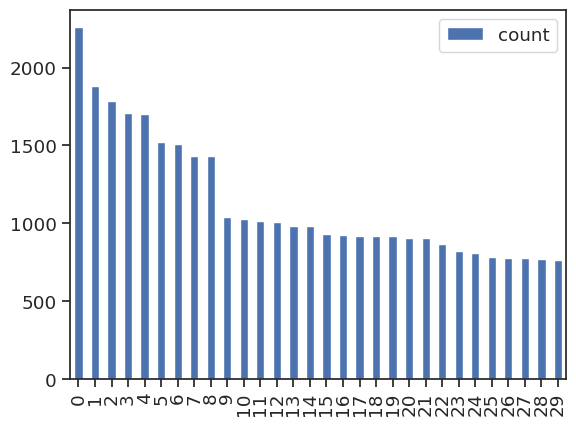

In [ ]:
freq = FreqDist(lemmatized_words)

df = pd.DataFrame(list(freq.most_common(30)))
df.columns = ['word', 'count']
df.plot(kind = 'bar')
print(df)

In [ ]:
print(lemmatized_words[:10])

['contributes', 'diversity', 'literature', 'probing', 'whether', 'diversity', 'paper', 'cited', 'frequently', 'nondiversity']


In [ ]:
num_topics = 5

num_topic_words = 10

model = tp.LDAModel(k = num_topics)

for abstract in training_data_filtered:
  model.add_doc(abstract.strip().split())

for i in range(0, 100, 10):
  model.train(10)
  print(f"Iteration: {i}\tLog-likelihood: {model.ll_per_word}")

print("\nTopic Model Results:\n\n")
topics = []
topic_individual_words = []
for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
    print(f"✨Topic {topic_number}✨\n\n{topic_words}\n")

Iteration: 0	Log-likelihood: -8.811756096910688
Iteration: 10	Log-likelihood: -8.530581155757949
Iteration: 20	Log-likelihood: -8.427953814174256
Iteration: 30	Log-likelihood: -8.38712326845795
Iteration: 40	Log-likelihood: -8.362017670670893
Iteration: 50	Log-likelihood: -8.342782460032431
Iteration: 60	Log-likelihood: -8.32701373317423
Iteration: 70	Log-likelihood: -8.313045392245161
Iteration: 80	Log-likelihood: -8.308355093795935
Iteration: 90	Log-likelihood: -8.299561627327602

Topic Model Results:


✨Topic 0✨

research information based studies use review psychology new decision data

✨Topic 1✨

health self well psychological results distress mental related participants life

✨Topic 2✨

performance diversity organizational research team leadership relationship model social theory

✨Topic 3✨

work job employees time well demands resources engagement satisfaction workers

✨Topic 4✨

social gender firms women firm csr media corporate financial data



In [ ]:
training_data = []
original_abstracts = []
titles = []
specific_stop_words = ['record', 'database', 'apa', 'psycinfo', 'rights', 'study', 'reserved', '/rid', 'rid', 'article', 'paper', 'also']

for entry in selected_articles:
  abstract = entry.get('abstract')
  for stopword in specific_stop_words:
    abstract = abstract.replace(stopword, "")
  processed_abstract = little_mallet_wrapper.process_string(abstract, numbers = 'remove')
  training_data.append(processed_abstract)
  original_abstracts.append(abstract)
  titles.append(entry.get('title'))

training_data_filtered = []

for abstract in training_data:
  words = abstract.split()
  filtered_words = []
  for word in words:
    if word not in specific_stop_words:
      filtered_words.append(word)
  filtered_string = " ".join(filtered_words)
  training_data_filtered.append(filtered_string)

print(training_data_filtered[0:2])

['contributes diversity literature probing whether diversity cited frequently nondiversity management industrial/organizational i/o psychology journals based stigma association theory argue result association minority groups diversity may devalued thus othered scholars using citation analysis published peer reviewed management i/o psychology journals present empirical evidence diversity cited significantly less frequently nondiversity authors gender institutional prestige journal tier domain year publication moderators used scenario experiment demonstrate stigma association effect authors gender demonstrated significant moderating effect experiment', 'diversity validity dilemma one enduring challenges personnel selection technological advances new techniques analyzing data within fields machine learning industrial organizational psychology however opening innovative ways addressing dilemma given rapid advances first present framework unifying analytical methods commonly used two fields